### EDA of the FOMC data set

* High level notes:
    * 463,210 sentences
    * 28,823 sentences contain a '?'
    * 69 sentences contain 'will you'
    * 195 sentences contain 'can you?'
    * 11 sentences contain 'i will'
    * The phrases ['can you', 'will you', 'i will'] are all VERB, PRON Lemma combinations and MD, PRP tag combinations.

In [136]:
import pandas as pd
import numpy as np
import json
import spacy
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [3]:
nlp = spacy.load("en_core_web_sm") 

In [4]:
file = 'fomc_transcripts.jsonlist'

In [5]:
files = []
for line in  open(file, 'r'):
    files.append(json.loads(line))

In [6]:
len(files)

268

In [9]:
list_of_sentences = []

In [10]:
sentence_data = pd.DataFrame(columns=['transcript_ID', 'sentence', 'lemmas',
                                     'pos', 'tag', 'dep'])

* Below code block takes about one hour to run

In [24]:
# ID = 0
# for file in files:
#     for speech in file['speeches']:
#         for sentence in speech['sentences']:
#             nlp_sentence = nlp(sentence['words'])
#             lemmas = []
#             poss = []
#             tags = []
#             deps = []
#             for token in nlp_sentence:
#                 lemmas.append(token.lemma_)
#                 poss.append(token.pos_)
#                 tags.append(token.tag_)
#                 deps.append(token.dep_,)
#             list_of_sentences.append([ID, sentence['words'], lemmas, poss, tags, deps])
#     ID += 1
#     print(ID)

In [1]:
# list_of_sentences[0]

In [12]:
len(list_of_sentences)

463210

In [20]:
# sentence_data.append(pd.DataFrame(list_of_sentences, columns=sentence_data.columns)).to_csv('fomc_nlp.csv')

In [22]:
fomc_data_nlp = sentence_data.append(pd.DataFrame(list_of_sentences, columns=sentence_data.columns))

In [23]:
fomc_data_nlp.shape

(463210, 6)

In [25]:
fomc_data_nlp.head()

,transcript_ID,sentence,lemmas,pos,tag,dep
0,0,"gentlemen , this meeting will now come to orde...","[gentleman, ,, this, meeting, will, now, come,...","[NOUN, PUNCT, DET, NOUN, VERB, ADV, VERB, PART...","[NNS, ,, DT, NN, MD, RB, VB, TO, VB, ,, UH, .]","[npadvmod, punct, det, nsubj, aux, advmod, ROO..."
1,0,there are several items that i thought would b...,"[there, be, several, item, that, i, think, wou...","[PRON, AUX, ADJ, NOUN, DET, PRON, VERB, VERB, ...","[EX, VBP, JJ, NNS, WDT, PRP, VBD, MD, VB, RBS,...","[expl, ROOT, amod, attr, nsubj, nsubj, relcl, ..."
2,0,and one of them is the agreement concluded by ...,"[and, one, of, -PRON-, be, the, agreement, con...","[CCONJ, NUM, ADP, PRON, AUX, DET, NOUN, VERB, ...","[CC, CD, IN, PRP, VBZ, DT, NN, VBN, IN, DT, JJ...","[cc, nsubj, prep, pobj, ROOT, det, attr, acl, ..."
3,0,the agreement has been distributed to the memb...,"[the, agreement, have, be, distribute, to, the...","[DET, NOUN, AUX, AUX, VERB, ADP, DET, NOUN, AD...","[DT, NN, VBZ, VBN, VBN, IN, DT, NNS, IN, DT, N...","[det, nsubjpass, aux, auxpass, ROOT, prep, det..."
4,0,i hope you 've all had an opportunity to revie...,"[i, hope, -PRON-, ', ve, all, have, an, opport...","[PRON, VERB, PRON, PUNCT, PROPN, DET, AUX, DET...","[PRP, VBP, PRP, '', NNP, DT, VBD, DT, NN, TO, ...","[nsubj, ROOT, nsubj, punct, nsubj, appos, ROOT..."


In [29]:
questions_fomc_data = fomc_data_nlp[fomc_data_nlp['sentence'].str.contains('?', regex=False) == True]

In [38]:
questions_fomc_data.shape

(28823, 6)

In [34]:
will_you_data = questions_fomc_data[questions_fomc_data['sentence'].str.contains(
    'will you', regex=False) == True]

In [36]:
will_you_data.shape

(69, 6)

In [35]:
can_you_data = questions_fomc_data[questions_fomc_data['sentence'].str.contains(
    'can you', regex=False) == True]

In [37]:
can_you_data.shape

(195, 6)

In [42]:
will_you_data.head()

,transcript_ID,sentence,lemmas,pos,tag,dep
6866,5,will you translate that into percentage change...,"[will, -PRON-, translate, that, into, percenta...","[VERB, PRON, VERB, SCONJ, ADP, NOUN, NOUN, PUN...","[MD, PRP, VB, IN, IN, NN, NN, ,, RB, ,, NNP, .]","[aux, nsubj, ROOT, dobj, prep, compound, pobj,..."
9939,7,"my question was , how will you know ?","[-PRON-, question, be, ,, how, will, -PRON-, k...","[DET, NOUN, AUX, PUNCT, ADV, VERB, PRON, VERB,...","[PRP$, NN, VBD, ,, WRB, MD, PRP, VB, .]","[poss, nsubj, ROOT, punct, advmod, aux, nsubj,..."
17583,11,"all right , now , tom , will you be in charge ...","[all, right, ,, now, ,, tom, ,, will, -PRON-, ...","[ADV, ADV, PUNCT, ADV, PUNCT, PROPN, PUNCT, VE...","[RB, RB, ,, RB, ,, NNP, ,, MD, PRP, VB, IN, NN...","[advmod, advmod, punct, advmod, punct, npadvmo..."
27723,18,"will you call the roll , mr. broida ?","[will, -PRON-, call, the, roll, ,, mr, ., broi...","[VERB, PRON, VERB, DET, NOUN, PUNCT, PROPN, PR...","[MD, PRP, VB, DT, NN, ,, NNP, NNP, NNP, .]","[aux, nsubj, ROOT, det, dobj, punct, dep, comp..."
29341,19,will you repeat the specifications ?,"[will, -PRON-, repeat, the, specification, ?]","[VERB, PRON, VERB, DET, NOUN, PUNCT]","[MD, PRP, VB, DT, NNS, .]","[aux, nsubj, ROOT, det, dobj, punct]"


In [47]:
i_will_data = questions_fomc_data[questions_fomc_data['sentence'].str.contains(
    'i will', regex=False) == True]

In [53]:
i_will_data.shape

(11, 6)

In [56]:
len(list(fomc_data_nlp['sentence']))

463210

In [163]:
sentence_lengths = []
for sentence in fomc_data_nlp['sentence']:
    sentence_lengths.append(len(sentence))

fomc_data_nlp['sentence_length'] = sentence_lengths

In [164]:
fomc_data_nlp.head()

,transcript_ID,sentence,lemmas,pos,tag,dep,sentence_length
0,0,"gentlemen , this meeting will now come to orde...","[gentleman, ,, this, meeting, will, now, come,...","[NOUN, PUNCT, DET, NOUN, VERB, ADV, VERB, PART...","[NNS, ,, DT, NN, MD, RB, VB, TO, VB, ,, UH, .]","[npadvmod, punct, det, nsubj, aux, advmod, ROO...",58
1,0,there are several items that i thought would b...,"[there, be, several, item, that, i, think, wou...","[PRON, AUX, ADJ, NOUN, DET, PRON, VERB, VERB, ...","[EX, VBP, JJ, NNS, WDT, PRP, VBD, MD, VB, RBS,...","[expl, ROOT, amod, attr, nsubj, nsubj, relcl, ...",84
2,0,and one of them is the agreement concluded by ...,"[and, one, of, -PRON-, be, the, agreement, con...","[CCONJ, NUM, ADP, PRON, AUX, DET, NOUN, VERB, ...","[CC, CD, IN, PRP, VBZ, DT, NN, VBN, IN, DT, JJ...","[cc, nsubj, prep, pobj, ROOT, det, attr, acl, ...",159
3,0,the agreement has been distributed to the memb...,"[the, agreement, have, be, distribute, to, the...","[DET, NOUN, AUX, AUX, VERB, ADP, DET, NOUN, AD...","[DT, NN, VBZ, VBN, VBN, IN, DT, NNS, IN, DT, N...","[det, nsubjpass, aux, auxpass, ROOT, prep, det...",68
4,0,i hope you 've all had an opportunity to revie...,"[i, hope, -PRON-, ', ve, all, have, an, opport...","[PRON, VERB, PRON, PUNCT, PROPN, DET, AUX, DET...","[PRP, VBP, PRP, '', NNP, DT, VBD, DT, NN, TO, ...","[nsubj, ROOT, nsubj, punct, nsubj, appos, ROOT...",52


In [166]:
lengths = fomc_data_nlp['sentence_length']

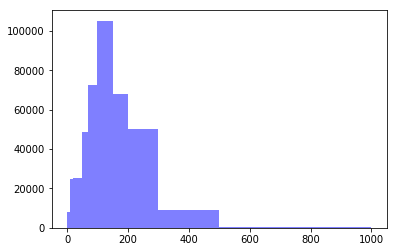

In [174]:
bins=[0, 10, 20, 30, 40, 50, 70, 100, 150, 200, 300, 500, 1000]
n, bins, patches = plt.hist(lengths, bins, facecolor='blue', alpha=0.5)
plt.show()

### K Means Clustering

In [112]:
fomc_documents = pd.DataFrame(columns=['transcript_ID', 'document'])

all_documents = fomc_data_nlp.groupby("transcript_ID")['sentence'].apply(
    lambda sentence: '&'.join(sentence))

In [115]:
# all_documents[0]

In [124]:
tf_idf_documents = all_documents.to_frame()

In [120]:
# tf_idf_documents.iloc[0]['sentence']

In [125]:
tf_idf_documents["sentence"]= tf_idf_documents["sentence"].str.split("&") 

In [128]:
# tf_idf_documents.iloc[0]['sentence']

### testing kmeans on one document

In [131]:
test_document = tf_idf_documents.iloc[0]['sentence']

In [133]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(test_document)
words = vectorizer.get_feature_names()

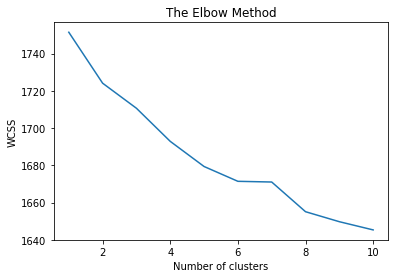

In [137]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [138]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [139]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [150]:
# print("Top terms per cluster:")
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :15]:
#         print(" %s" % terms[ind])

In [144]:
# print(“\n”)
# print(“Prediction”)
# X = vectorizer.transform(
#     ["Nothing is easy in cricket. But it is not. You have to use your brain and time the ball."])
# predicted = model.predict(X)
# print(predicted)

### testing kmeans on all documents

In [154]:
all_documents = []
for i in range(len(tf_idf_documents)):
               all_documents += tf_idf_documents.iloc[i]['sentence']

In [156]:
# all_documents

In [157]:
vectorizer = TfidfVectorizer(stop_words='english')
X2 = vectorizer.fit_transform(all_documents)
words2 = vectorizer.get_feature_names()

In [160]:
# wcss = []
# for i in range(1,11):
#     print(i)
#     kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=50,n_init=5,random_state=0)
#     kmeans.fit(X2)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1,11),wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [175]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [176]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [177]:
print("Top terms per cluster:")
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(" %s" % terms[ind])

Top terms per cluster:
Cluster 0:
 think
 thank
 mr
 chairman
 yes
 president
 just
 rate
 time
 year
 market
 growth
 point
 know
 policy
Cluster 1:
 going
 inflation
 think
 rate
 expectations
 growth
 forward
 policy
 economy
 rates
 forecast
 year
 core
 time
 higher
Cluster 2:
 lsb
 rsb
 laughter
 unintelligible
 appendix
 think
 statement
 rate
 percent
 going
 growth
 range
 just
 say
 time
Cluster 3:
 percent
 rate
 year
 growth
 10
 range
 quarter
 funds
 11
 inflation
 m2
 think
 real
 unemployment
 annual
Cluster 4:
 right
 think
 yes
 thank
 mr
 exactly
 absolutely
 probably
 just
 hope
 percent
 thing
 know
 wrong
 quite
Cluster 5:
 sure
 make
 want
 going
 quite
 know
 think
 just
 understand
 right
 way
 say
 point
 really
 exactly
